In [50]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import time
import scipy.integrate as integr

In [51]:
import InbeddingDiagramDNeg as Dia
import WormholeRayTracer as w
import WormholeGraphics as wg
import Symplectic_DNeg as Smpl
import RungeKutta as rk

In [52]:
path = os.getcwd()

In [53]:
Par = [0.8/1.42953, 8.6*2/4, 4.3*2/3] # M, rho, a parameters wormhole

initial_q = np.array([12, np.pi, np.pi/2])

In [55]:
print(Par, initial_q)
Grid_dimension = '3D'
mode = 0
Motion1, Grid1, CM1 = w.Simulate_DNeg(Smpl.Sympl_DNeg, Par, 0.01, 5000, initial_q, 20**2, 20**2, Grid_dimension, mode, wg.Grid_constr_3D_Sph)

[0.5596244919658909, 4.3, 2.8666666666666667] [12.          3.14159265  1.57079633]
829.6755919456482


In [56]:
Cosyst =  ' Sph '
cv2.imwrite(os.path.join(path, "Pictures/Image "+Grid_dimension+"Gr"+Cosyst+"DNeg Sympl"+str(Par)+" "+str(initial_q)+".png"),
            255*wg.Make_Pict_RGBP(Motion1[-1, 1], Grid1))

True

In [57]:
cv2.imwrite(os.path.join(path, "Pictures/Image "+"2DGr DNeg Sympl"+str(Par)+" "+str(initial_q)+".png"),
            255*wg.Make_Pict_RGBP(Motion1[-1, 1], wg.Grid_constr_2D(Motion1[-1, 1], 11, 1, 0.05)))

True

In [58]:
cv2.imwrite(os.path.join(path, "Pictures/Image "+"NoGrid DNeg Sympl"+str(Par)+" "+str(initial_q)+".png"),
            255*wg.Make_Pict_RGBP(Motion1[-1, 1], np.zeros(Motion1[-1, 1, 0].shape, dtype=bool)))

True

(423780012,) (5000, 400, 400)
(812947,) (5000, 18, 18)
True


<IPython.core.display.Javascript object>


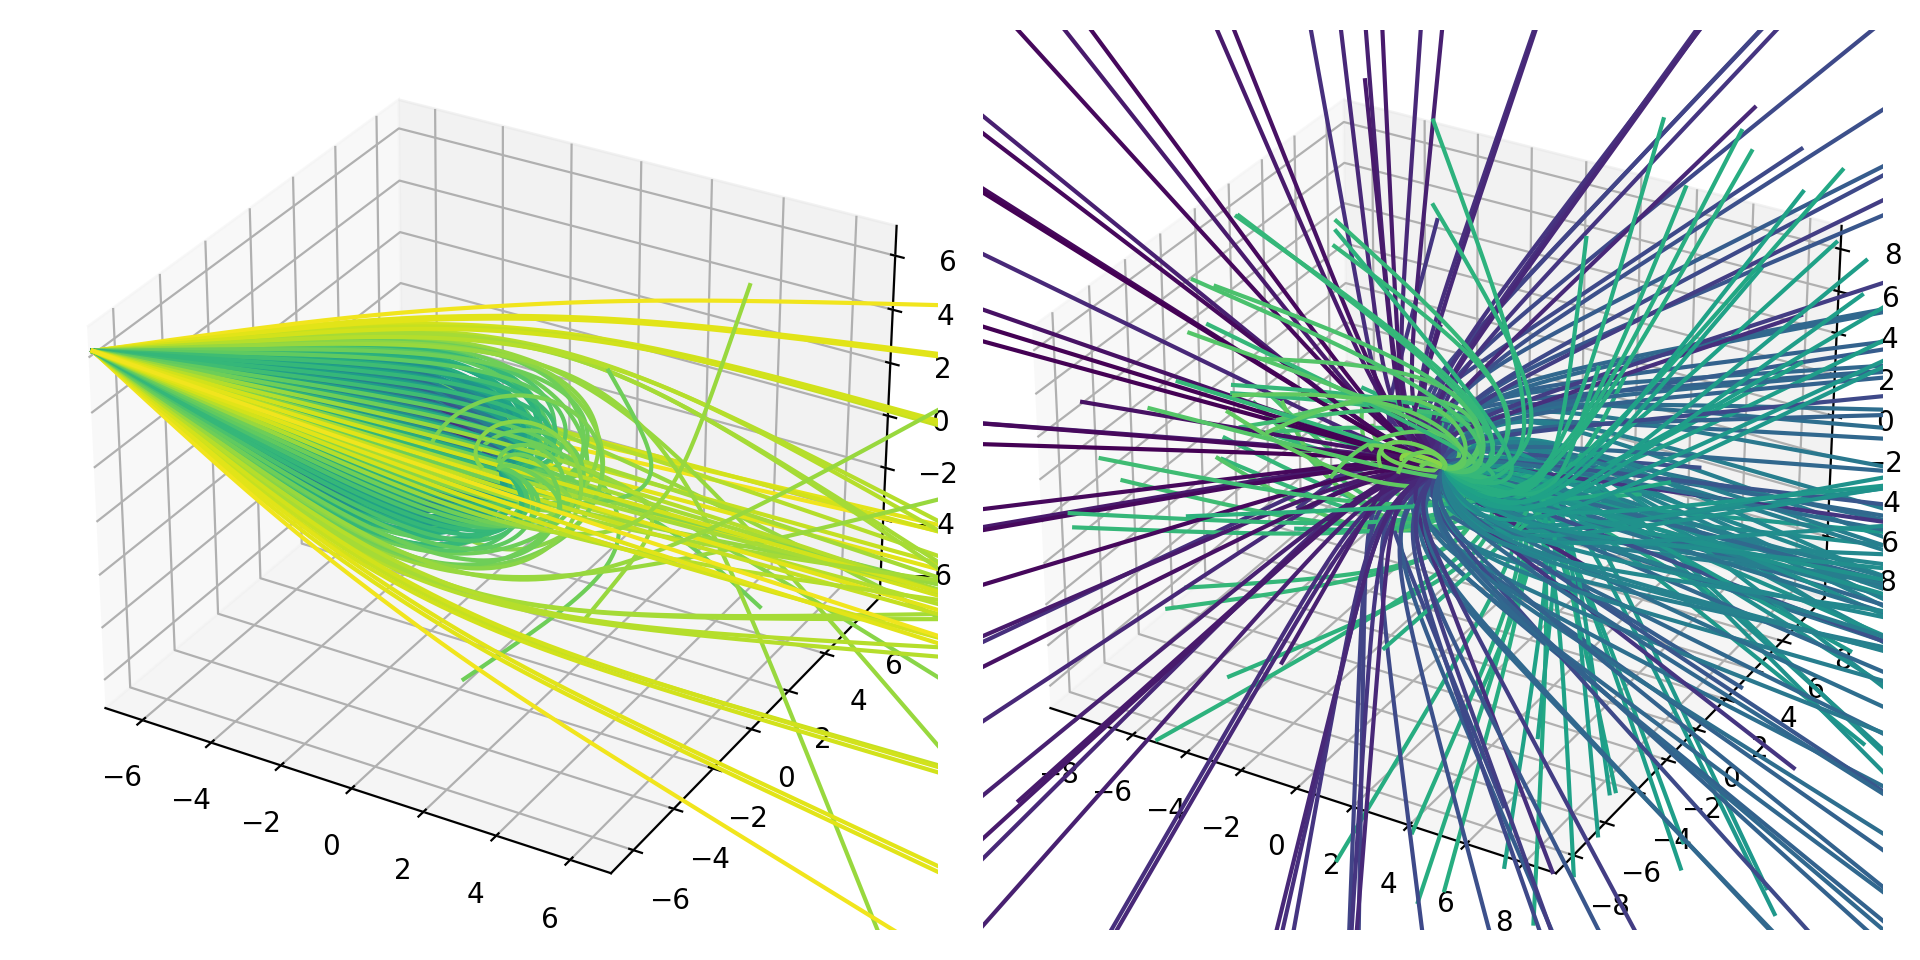

In [59]:
fullplot(Motion1[:, 1])

In [ ]:
Motion3, Grid3, CM3  = w.Simulate_DNeg(runge_kutta, Par, 0.05, 2000, initial_q, 20**2, 20**2, Grid_dimension, mode, wg.Grid_constr_3D_Sph)

In [213]:
cv2.imwrite(os.path.join(path, "Pictures/Image "+"NoGrid DNeg RK4"+str(Par)+" "+str(initial_q)+".png"),
            255*wg.Make_Pict_RGBP(Motion3[-1, 1], np.zeros(Motion3[-1, 1, 0].shape, dtype=bool)))

True

In [226]:
def simulate_raytracer_fullpath(t_end, Par, q0, N, Nz = 14**2, Ny = 14**2, methode = 'BDF'):
    """
    Solves the differential equations using a build in solver (solve_ivp) with
    specified method.
    Input:  - t_end: endtime of the Integration
            - Par: wormhole parameters
            - q0: position of the camera
            - Nz: number of vertical pixels
            - Ny: number of horizontal pixels
            - methode: method used for solving the ivp (standerd runge-kutta of fourth order)

    Output: - Motion: Usual 5D matrix
    """
    print('Initializing screen and calculating initial condition...')

    # end = int(np.ceil(np.sqrt(Ny**2+Nz**2)))
    M, rho, a = Par

    # Reading out values and determining parameters
    S_c = w.screen_cart(Nz, Ny, 1, 1)
    S_cT = np.transpose(S_c, (2,0,1))
    S_sph = w.cart_Sph(S_cT)
    p, Cst = w.inn_momenta(S_c, S_sph, w.Cst_DNeg, w.inn_mom_DNeg, Par)
    p1, p2, p3 = p
    q1, q2, q3 = q0
    Motion = np.empty((Nz,Ny,6,N))

    # Looping over all momenta
    for j in range(0, len(p1)):
        start_it = time.time()
        for i in range(0, len(p1[0])):
            start_it = time.time()
            initial_values = np.array([q1, q2, q3, p1[j][i], p2[j][i], p3[j][i], M, rho, a])
            # Integrates to the solution
            Motion[j,i] = integr.solve_ivp(w.diff_equations, [t_end, 0], initial_values, method = methode, t_eval=np.linspace(t_end, 0, N)).y[:6]

        end_it = time.time()
        duration = end_it - start_it
        print('Iteration ' + str((j, i)) + ' completed in ' + str(duration) + 's.')
    return np.transpose(np.array([Motion[:,:,0:3], Motion[:,:,3:]]), (4,0,3,1,2)) #output same shape as sympl. intgr.

In [60]:
Motion2 = w.simulate_raytracer_fullpath(50, Par, initial_q, 500, 20**2, 20**2, 'RK45')

Initializing screen and calculating initial condition...
Iteration (0, 399) completed in 0.013107776641845703s.
Iteration (1, 399) completed in 0.014330148696899414s.
Iteration (2, 399) completed in 0.012942075729370117s.
Iteration (3, 399) completed in 0.01701807975769043s.
Iteration (4, 399) completed in 0.012387990951538086s.
Iteration (5, 399) completed in 0.015585660934448242s.
Iteration (6, 399) completed in 0.014706850051879883s.
Iteration (7, 399) completed in 0.014197111129760742s.
Iteration (8, 399) completed in 0.012985706329345703s.
Iteration (9, 399) completed in 0.014178037643432617s.
Iteration (10, 399) completed in 0.013358116149902344s.
Iteration (11, 399) completed in 0.013565301895141602s.
Iteration (12, 399) completed in 0.01480722427368164s.
Iteration (13, 399) completed in 0.013389825820922852s.
Iteration (14, 399) completed in 0.015084028244018555s.
Iteration (15, 399) completed in 0.012804746627807617s.
Iteration (16, 399) completed in 0.014154195785522461s.
Ite

In [61]:
cv2.imwrite(os.path.join(path, "Pictures/Image "+"2DGr DNeg Scipy RK45"+str(Par)+" "+str(initial_q)+".png"),
            255*wg.Make_Pict_RGBP(Motion2[-1, 1], wg.Grid_constr_2D(Motion2[-1, 1], 11, 1, 0.05)))

True

In [62]:
cv2.imwrite(os.path.join(path, "Pictures/Image "+"NoGrid DNeg scipy RK45"+str(Par)+" "+str(initial_q)+".png"),
            255*wg.Make_Pict_RGBP(Motion2[-1, 1], np.zeros(Motion2[-1, 1, 0].shape, dtype=bool)))

True

(44831505,) (500, 400, 400)
(86360,) (500, 18, 18)
True


<IPython.core.display.Javascript object>


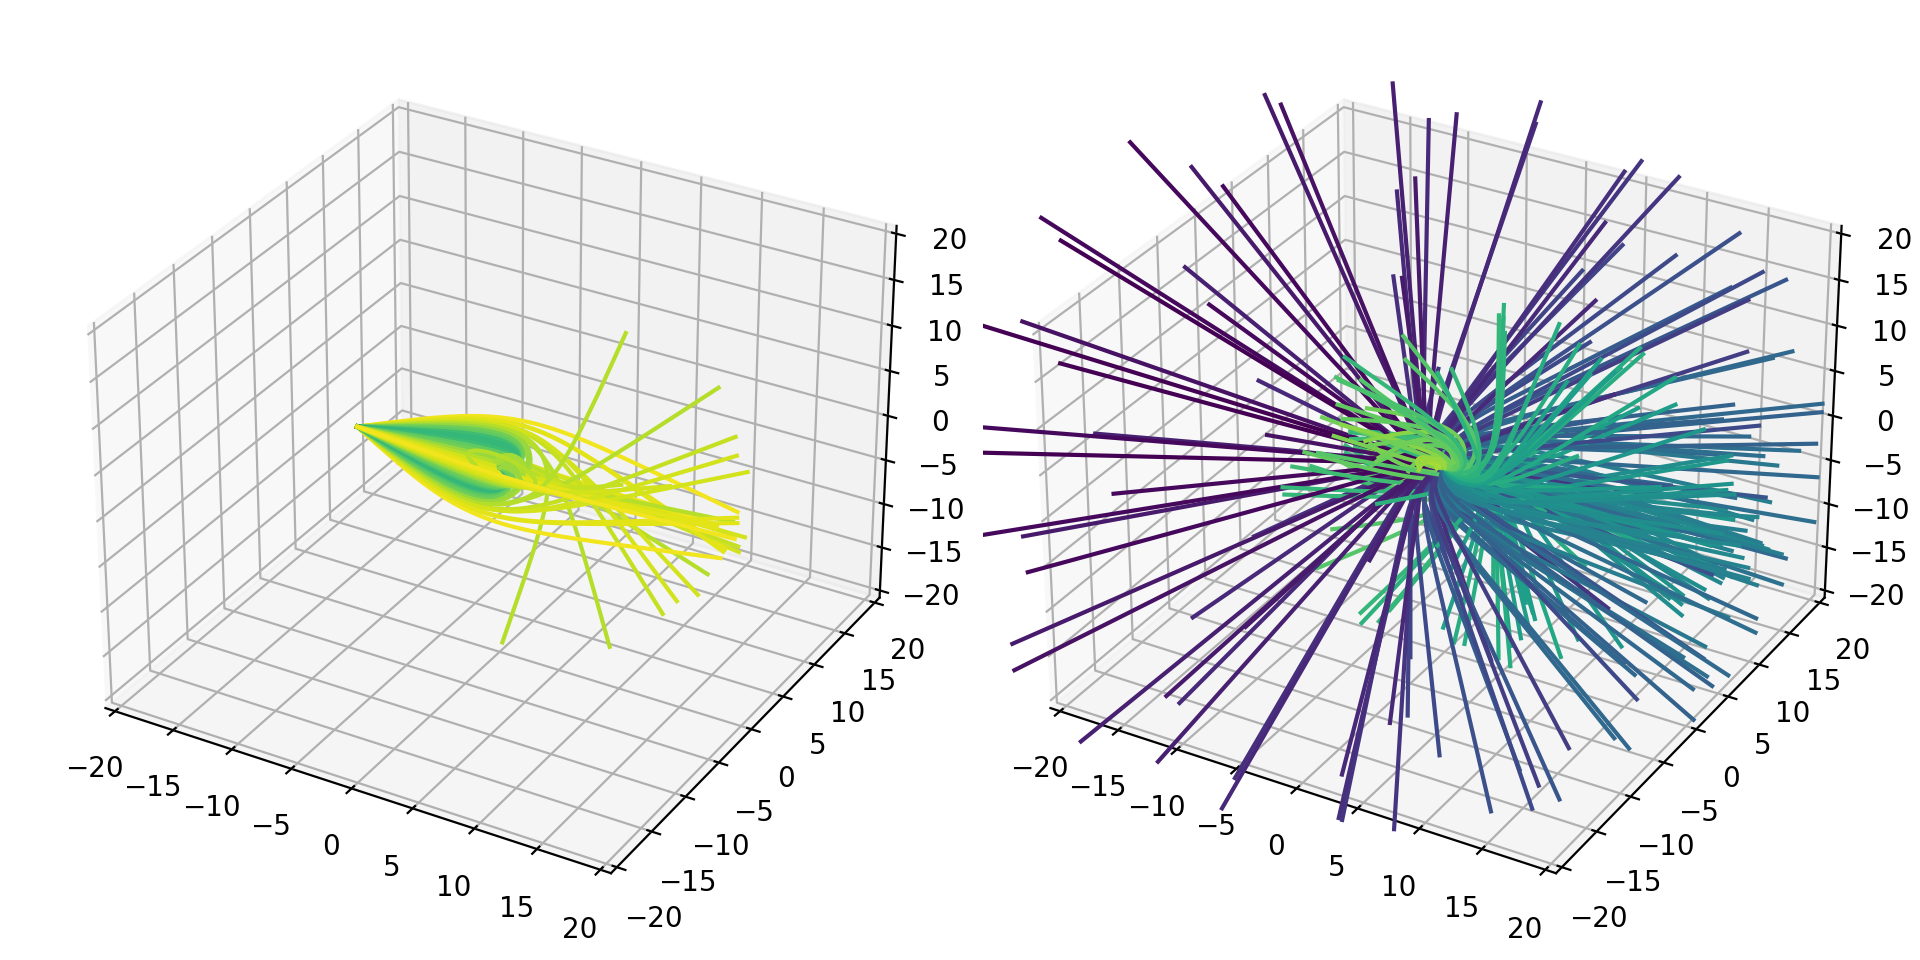

In [63]:
fullplot(Motion2[:, 1])

In [5]:
q_scipy_symm = w.wormhole_with_symmetry2(100, Par, initial_q, 20**2, 20**2)

Initializing screen and calculating initial condition...
[[[0.5       ]
  [0.5       ]
  [0.5       ]
  ...
  [0.5       ]
  [0.5       ]
  [0.5       ]]

 [[0.        ]
  [0.00250627]
  [0.00501253]
  ...
  [0.99498747]
  [0.99749373]
  [1.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]]
Tijdsduur = 7.157625198364258
Rotating ray...
(3, 400, 1)
(400, 1) (400, 1)
(400, 1)
(3, 400, 400)
Ray rotated!


In [6]:
cv2.imwrite(os.path.join(path, "Pictures/Image "+"2DGr NewSymm DNeg Scipy intgr."+str(Par)+" "+str(initial_q)+".png"),
            255*wg.Make_Pict_RGBP(q_scipy_symm, wg.Grid_constr_2D(q_scipy_symm, 11, 1, 0.05)))

True

In [ ]:
M = alpha.size
q_flat = np.empty((3,M))
alpha = alpha.flatten().reshape(M,1)
r_polar = r_polar.flatten().reshape(M,1)
k = np.argmin(np.abs(R.reshape(1, int(Ny/2)) - r_polar), axis=1)
q = np.concatenate(
            np.cos(alpha/2),
            np.sin(alpha/2)*np.tile(Rot_axis,(1,M)), axis=0
            )
for i in range(M):
    q_flat[3, i] = np.dot(rotation_quat(q[i]), q_cart[:,0,k[i]])

In [ ]:
np.array([[0,2],[1,3]]).flatten()

In [72]:
def gdsc(Motion, Par, name, path, geo_label = None, select = None, reduce = False):
    # input: Motion: 5D matrix, the elements being [p, q] with p, q as defined earlier
    #       Par: parameters wormhole
    #       Name: picture/filename
    #       Path: directory
    #       select: Give a list of 2D indices to plot only specific geodesiscs
    #       geo_label: if you're just plotting a list of geodesics (thus its elements in order time, [p,q], coordinate),
    #                   then give here a list of strings that which will be the label of your geodesics, corresponding to the order of your geodesics.
    #       reduce: if true sample geodescics uniformly
    M, rho, a = Par

    if np.any(select == None):
        if np.any(reduce == False):
            Sample = np.transpose(Motion, (1,2,3,0))
        else:
            Motion = np.transpose(Motion, (1,2,0,3,4))
            Ny, Nz =  Motion[0][0][0].shape
            Ny_s = int(np.sqrt(Nz))
            Nz_s = int(np.sqrt(Ny))

            # Samples a uniform portion of the rays for visualisation
            Sample = Motion[:, :, :, 1::Nz_s, 1::Ny_s]
            cl, ind = ray_spread(Nz_s, Ny_s)

    else:
        Motion = np.transpose(Motion, (3,4,0,1,2))
        Sample = np.transpose(
            [Motion[tuple(select[k])] for k in range(len(select))]
            , (2,3,1,0))

    p, q = Sample
    p_l, p_phi, p_th = p
    l, phi, theta = q
    # caluclates coordinates in inbedded space
    ax = plt.figure().add_subplot(projection='3d')
    r = w.dneg_r(l, M, rho, a)
    X, Y = r*np.cos(phi), r*np.sin(phi)
    
    S_l = np.linspace(np.max(l), np.min(l), len(l))
    Col_l = np.concatenate((l.T, np.expand_dims(S_l, axis=0)), axis=0).T
    Col_Z = Dia.imb_f_int(Col_l, Par)
    Z = Col_Z[:,:-1]
    S_Z0 = Col_Z[:,-1] + np.max(Z)

    if np.any(reduce == False):
        for k in range(len(Sample[0,0,0])):
            if np.any(geo_label == None):
                gl = str(select[k])
            else:
                gl = geo_label[k]
            ax.plot(X[:,k], Y[:,k], Z[:,k])
        ax.scatter(X[0,0] , Y[0,0], Z[0,0], label='camera', c = 'r')
        #ax.set_title("Path of a geodesic that lead to noise")
        ax.legend()
    else:
        for i in range(Nz_s):
            for j in range(Ny_s):
                ij = i + Nz_s*j
                cl_i =cl[ind[ij]]
                ax.plot(X[:,i,j], Y[:,i,j], Z[:,i,j], color = cl_i, alpha=0.5)
        ax.scatter(X[0,0,0] , Y[0,0,0], Z[0,0,0], label='camera', c = 'r')
        ax.set_title("Geodesics")
        ax.legend()

    # adds surface

    #S_l = np.linspace(np.max(l), np.min(l), len(l))
    S_phi = np.linspace(0, 2*np.pi, len(l))
    S_R, S_PHI = np.meshgrid(w.dneg_r(S_l, M, rho, a), S_phi) # radius is r(l)

    # tile because symmetric for rotations, undependant on phi
    # Integral for Z direction like defined in the paper
    S_Z = np.tile(S_Z0, (len(l), 1)) #z(l)
    
    S_X, S_Y = S_R*np.cos(S_PHI), S_R*np.sin(S_PHI)
    #print(S_X.shape, S_Y.shape, S_Z.shape)
    ax.plot_surface(S_X, S_Y, S_Z, cmap=plt.cm.YlGnBu_r, alpha=0.5)
    plt.tight_layout()
    # Hide grid lines
    ax.grid(False)

    ax.axis("off")
    #ax.set_zlim([-10,10])
    plt.savefig(os.path.join(path, name), dpi=150)
    plt.show()

<IPython.core.display.Javascript object>


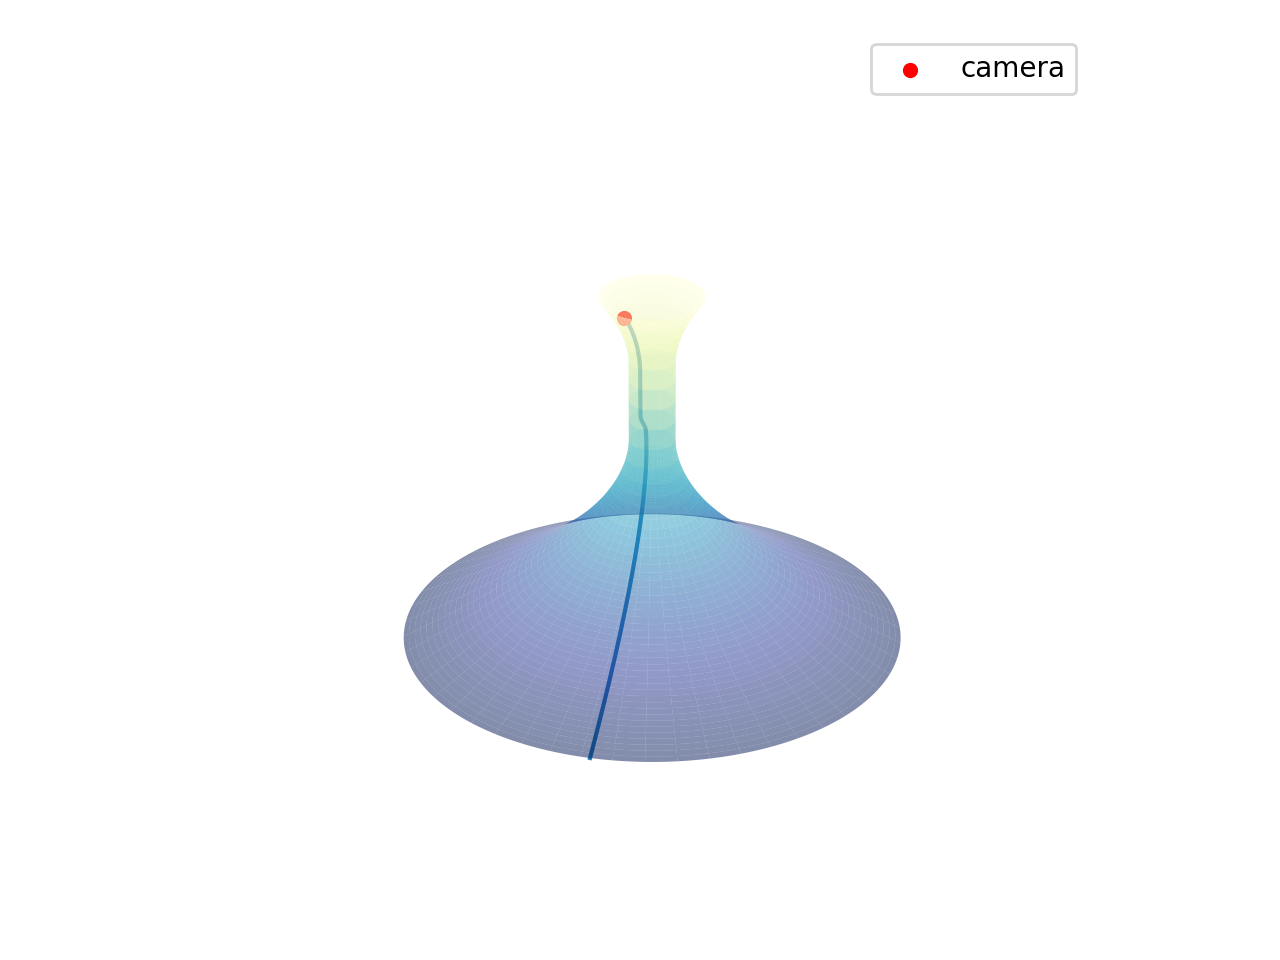

In [74]:
Geo_label = ['a', 'b', 'c', 'd']
#Geo_Sel = None
#Geo_Sel = [[20,25],[65,15],[71,58],[145,142]]
#Geo_Sel = [[68,200]] #noise symplectic [0.8/1.42953, 8.6*2/3, 4.3*2/3] [12, np.pi, np.pi/2]
Geo_Sel = [[360, 199]] #noise RK [0.8/1.42953, 8.6*2/3, 4.3*2/3] [12, np.pi, np.pi/2]
if Geo_Sel == None:
    Geo_txt = ""
else:
    Geo_txt = str(Geo_Sel)
gdsc(Motion2, Par, "Pictures/Noise "+Geo_txt+" DNeg scipy RK45"+str(Par)+" "+str(initial_q)+".png", path, Geo_label, Geo_Sel)

In [24]:
def plot_CM(CM, Label, name, path):
    #input: 3D array containing energy of each ray over time, advancement in time on first row
    # plot the constants of motion over the partition of the rays

    Ny, Nz =  CM[0,0].shape
    CM = np.transpose(CM, (1,0,2,3))
    N_C = len(CM)
    cl, ind = wg.ray_spread(Nz, Ny)

    fig, ax = plt.subplots(1, N_C)
    x = np.arange(len(CM[0]))
    for k in range(N_C):
        for i in range(Nz):
            for j in range(Ny):
                ij = i + Nz*j
                cl_i =cl[ind[ij]]
                ax[k].plot(x, CM[k,:,i,j], color=cl_i)
        ax[k].set_yscale("log")
        #ax[k].set_title(Label[k] + ",  Donker pixels binnenkant scherm, lichte pixels buitenkant")
        ax[k].set_xlabel("timesteps")
        ax[k].set_ylabel(Label[k])
        ax[k].set_title("sum subdivision rays")
    plt.tight_layout()
    plt.savefig(os.path.join(path, name), dpi=150)
    plt.show()

In [66]:
CM2 = np.array([w.DNeg_CM(Motion2[k,0], Motion2[k,1], Par) for k in range(len(Motion2))])

<IPython.core.display.Javascript object>


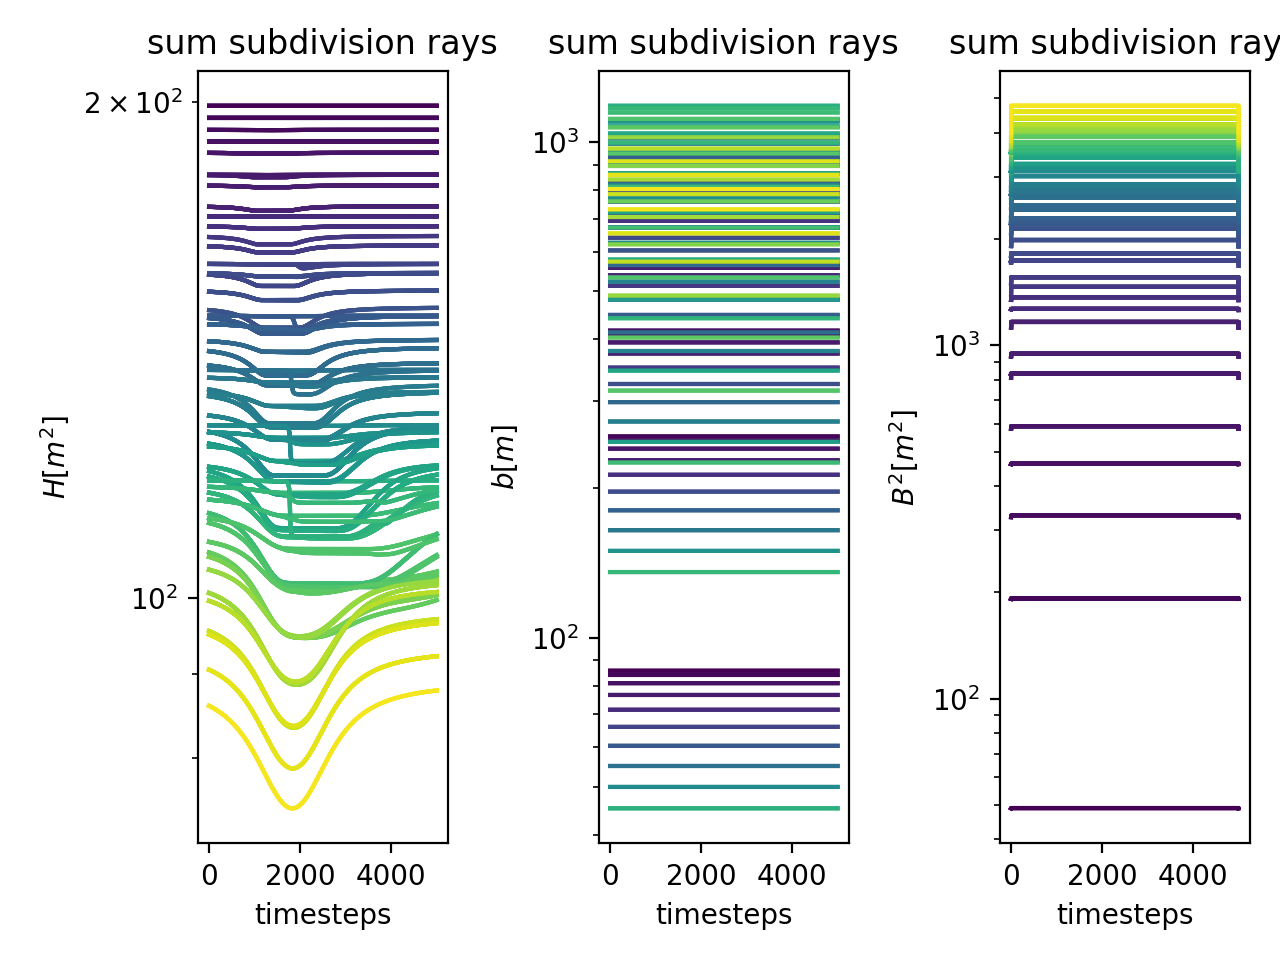

In [64]:
plot_CM(CM1, ['$H$[$m^{2}$]', '$b$[$m$]', '$B^{2}$[$m^{2}$]'], "Pictures/CM DNeg Sympl"+str(Par)+" "+str(initial_q)+".png", path)

<IPython.core.display.Javascript object>


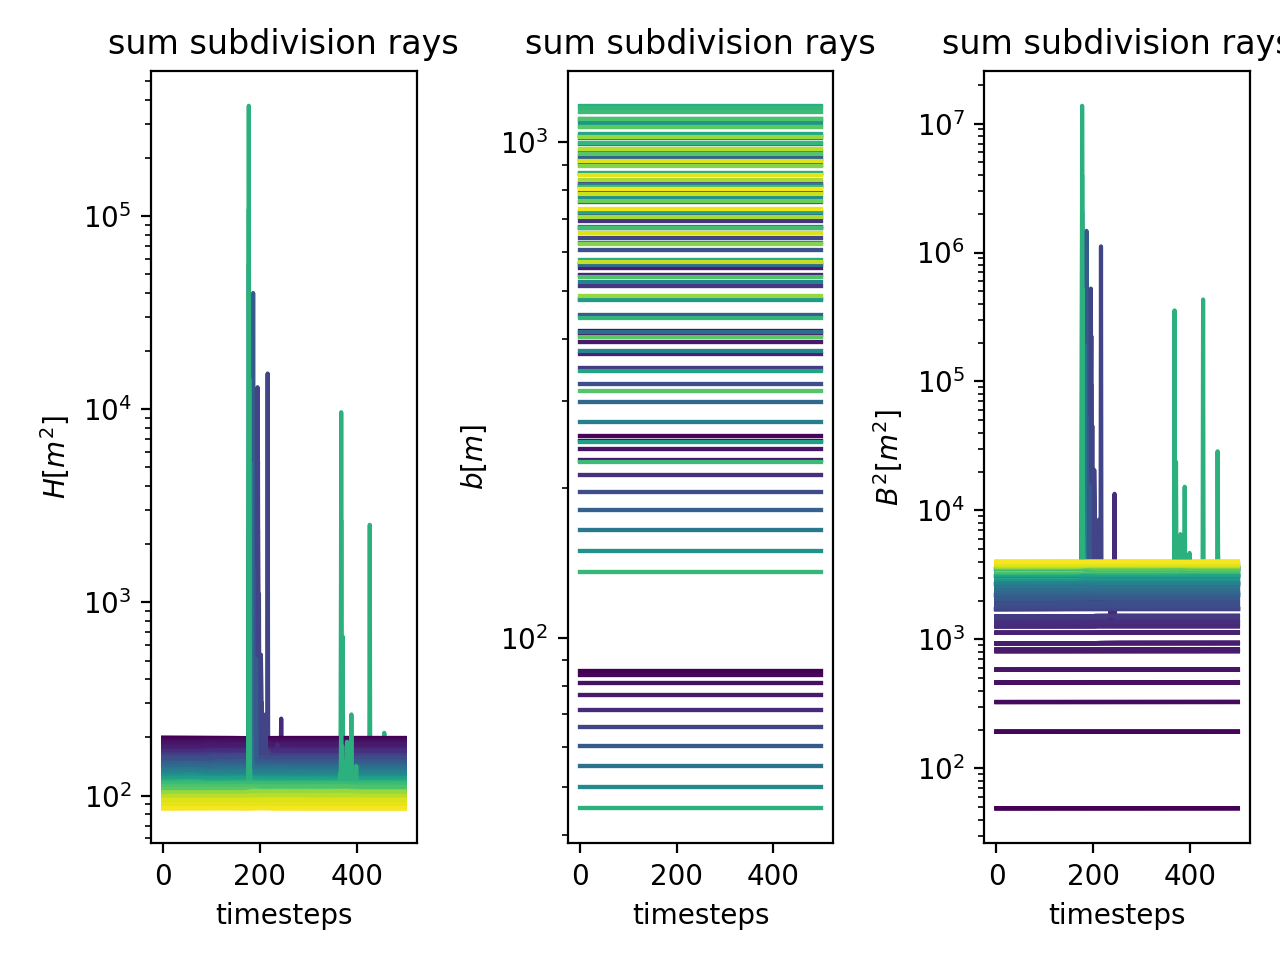

In [67]:
plot_CM(CM2, ['$H$[$m^{2}$]', '$b$[$m$]', '$B^{2}$[$m^{2}$]'], "Pictures/CM DNeg scipy RK45"+str(Par)+" "+str(initial_q)+".png", path)

<IPython.core.display.Javascript object>


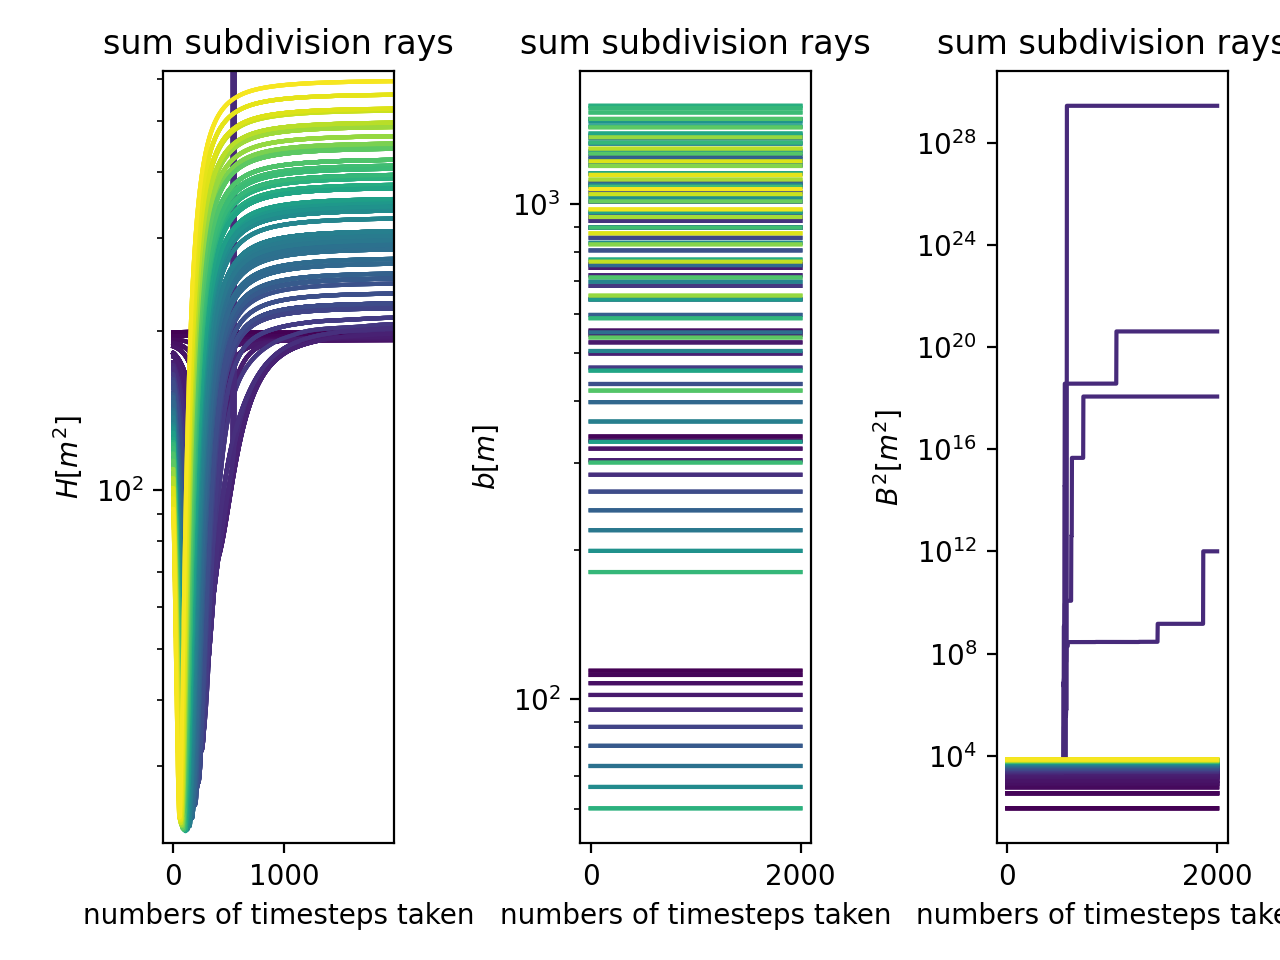

In [60]:
plot_CM(CM3, ['$H$[$m^{2}$]', '$b$[$m$]', '$B^{2}$[$m^{2}$]'], "Pictures/CM DNeg RK4"+str(Par)+" "+str(initial_q)+".png", path)

<IPython.core.display.Javascript object>


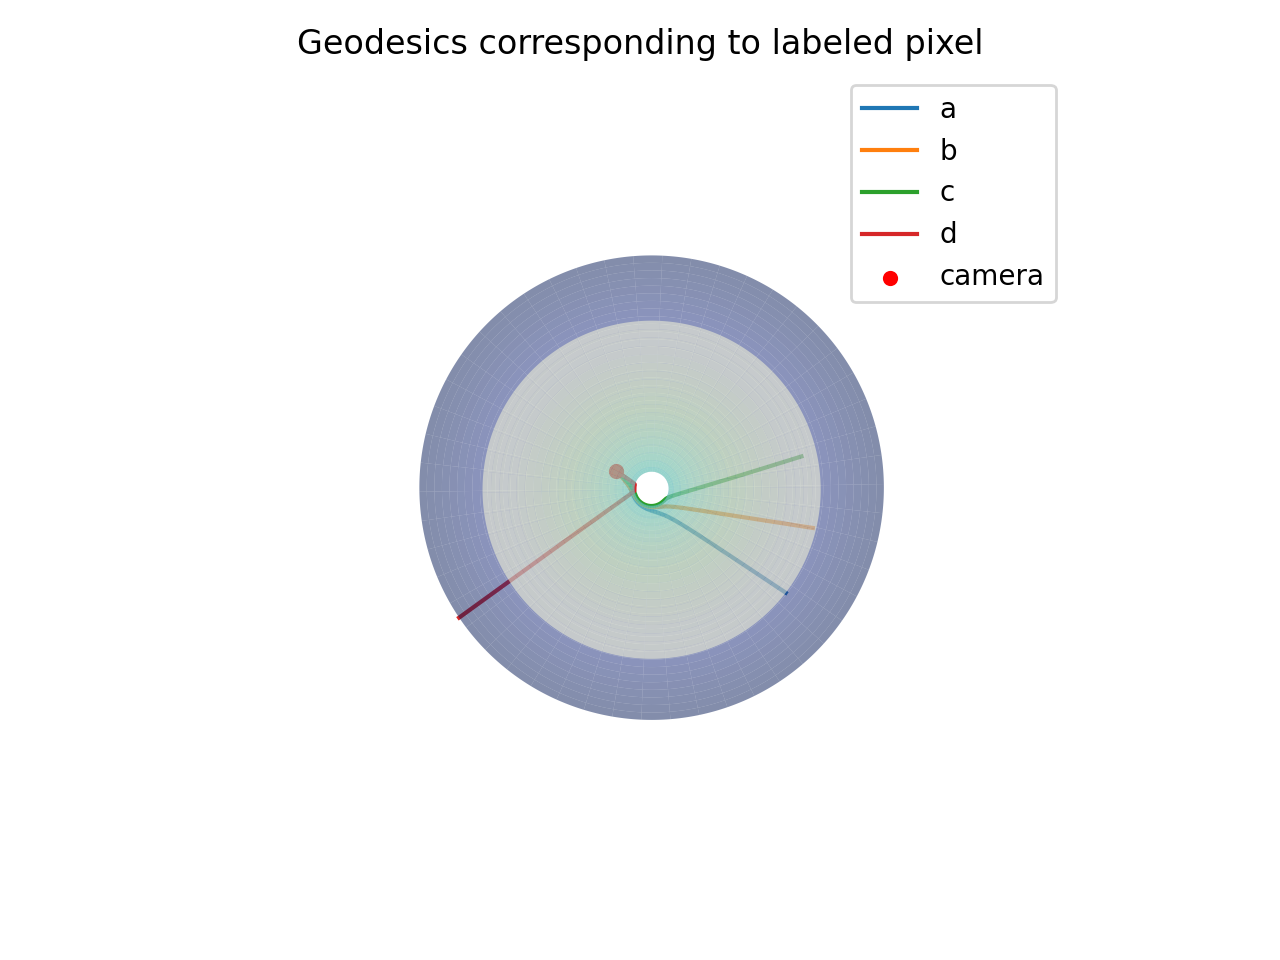

In [63]:
Geo_label = ['a', 'b', 'c', 'd']
#Geo_Sel = None
Geo_Sel = [[20,25],[65,15],[71,58],[145,142]]
#Geo_Sel = [[68,200]] #noise symplectic [0.8/1.42953, 8.6*2/3, 4.3*2/3] [12, np.pi, np.pi/2]
#Geo_Sel = [[360, 199]] #noise RK [0.8/1.42953, 8.6*2/3, 4.3*2/3] [12, np.pi, np.pi/2]
if Geo_Sel == None:
    Geo_txt = ""
else:
    Geo_txt = str(Geo_Sel)
gdsc(Motion1, Par, "Pictures/geodesics "+Geo_txt+" DNeg Sympl"+str(Par)+" "+str(initial_q)+".png", path, Geo_label, Geo_Sel)

<IPython.core.display.Javascript object>


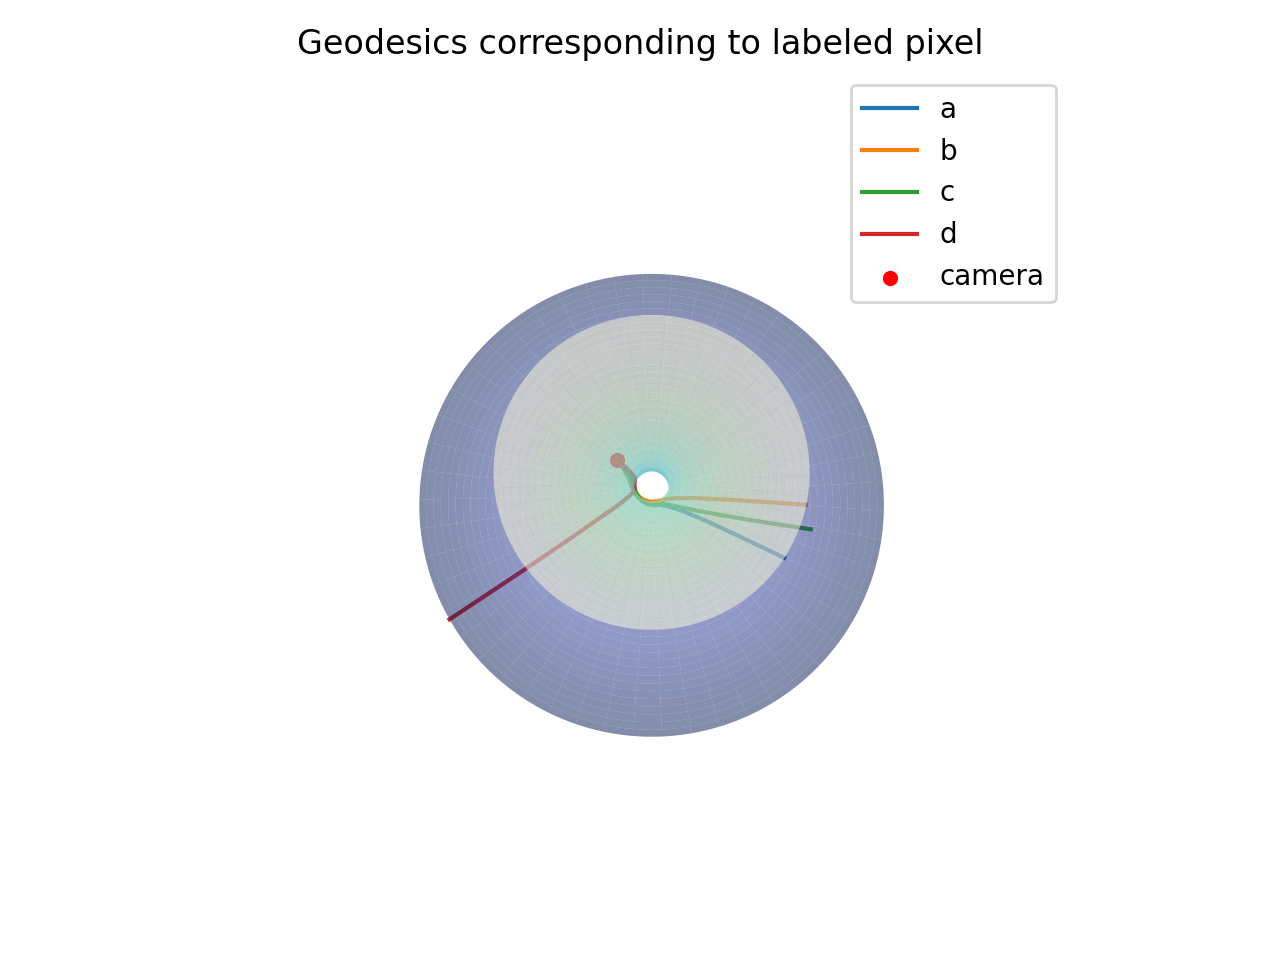

In [67]:
Geo_label = ['a', 'b', 'c', 'd']
#Geo_Sel = None
Geo_Sel = [[4,4],[36,11],[71,58],[145,142]]
#Geo_Sel = [[68,200]] #noise symplectic [0.8/1.42953, 8.6*2/3, 4.3*2/3] [12, np.pi, np.pi/2]
#Geo_Sel = [[360, 199]] #noise RK [0.8/1.42953, 8.6*2/3, 4.3*2/3] [12, np.pi, np.pi/2]
if Geo_Sel == None:
    Geo_txt = ""
else:
    Geo_txt = str(Geo_Sel)
gdsc(Motion2, Par, "Pictures/geodesics "+Geo_txt+" DNeg scipy RK45"+str(Par)+" "+str(initial_q)+".png", path, Geo_label, Geo_Sel)